<a href="https://colab.research.google.com/github/NITINBOBADE1/Public-repository-/blob/original/IPL_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IPL MATCH VENUE AND WINNER DATA**

Column Description

id : Unique identifier for each match.

city : City where the match was played.

date : Date of the match.

player_of_match : Name of the player who was awarded "Player of the Match."

venue : Stadium or venue where the match was played.

neutral_venue : Binary indicator (0 or 1) indicating if the match was played on a neutral venue (1) or not (0).

team1 : Name of the first team participating in the match.

team2 : Name of the second team participating in the match.

toss_winner : Name of the team that won the toss.

toss_decision : Decision taken by the toss-winning team (either 'field' or 'bat').

winner : Name of the team that won the match.

result : The result of the match (e.g., 'runs', 'wickets', 'tie', etc.).

result_margin : The margin by which the winning team won the match (e.g., runs or wickets).

eliminator : Binary indicator (0 or 1) indicating if the match was decided by an eliminator (1) or not (0).

method : The method used to decide the match (e.g., Duckworth-Lewis, etc.).

umpire1 : Name of the first on-field umpire.

umpire2 : Name of the second on-field umpire. bold text

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IPL Matches 2008-2020.csv to IPL Matches 2008-2020.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['IPL Matches 2008-2020.csv']))
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
data.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [ ]:
data.isnull().sum()


id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [ ]:
data.drop('id','method'],axis = 1,inplace = True)
data.shape

(816, 16)

In [ ]:
data = data.dropna()
data.shape

(786, 16)

In [ ]:
data.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

 we can see that Rising Pune Supergiants and Rising Pune Supergiant are two different teams ,but these are the same team and it's a type error here.

we can also check team 2 column and toss_winner for any type error.

In [ ]:
data.team2.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
data.toss_winner.unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
data.winner.unique()


array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
data['team1'] = data.team1.str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
data['team2'] = data.team2.str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
data['winner'] = data.winner.str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
data['toss_winner'] = data.toss_winner.str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [ ]:
data=data.astype({'date':str})
data[['year','month','day']]=data.date.str.split('-',expand=True)

In [ ]:
data=data.astype({'year':'int32','month':'int32','day':'int32'})

In [ ]:
data.drop(['date'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               786 non-null    int64  
 1   city             786 non-null    object 
 2   player_of_match  786 non-null    object 
 3   venue            786 non-null    object 
 4   neutral_venue    786 non-null    int64  
 5   team1            786 non-null    object 
 6   team2            786 non-null    object 
 7   toss_winner      786 non-null    object 
 8   toss_decision    786 non-null    object 
 9   winner           786 non-null    object 
 10  result           786 non-null    object 
 11  result_margin    786 non-null    float64
 12  eliminator       786 non-null    object 
 13  umpire1          786 non-null    object 
 14  umpire2          786 non-null    object 
 15  year             786 non-null    int32  
 16  month            786 non-null    int32  
 17  day             

**Plotting bar graph of no of matches in per years**

<Axes: >

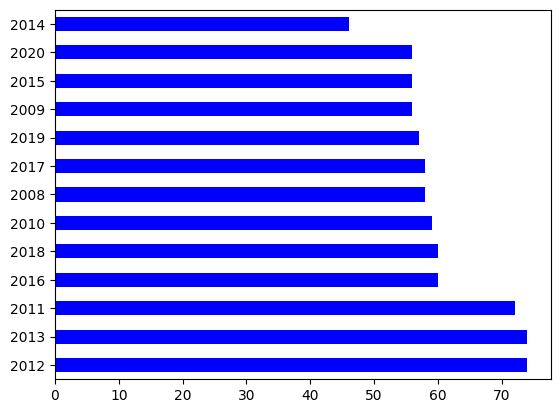

In [ ]:
data['year'].value_counts().plot(kind='barh',color='blue')

**Number of matches played over the months**

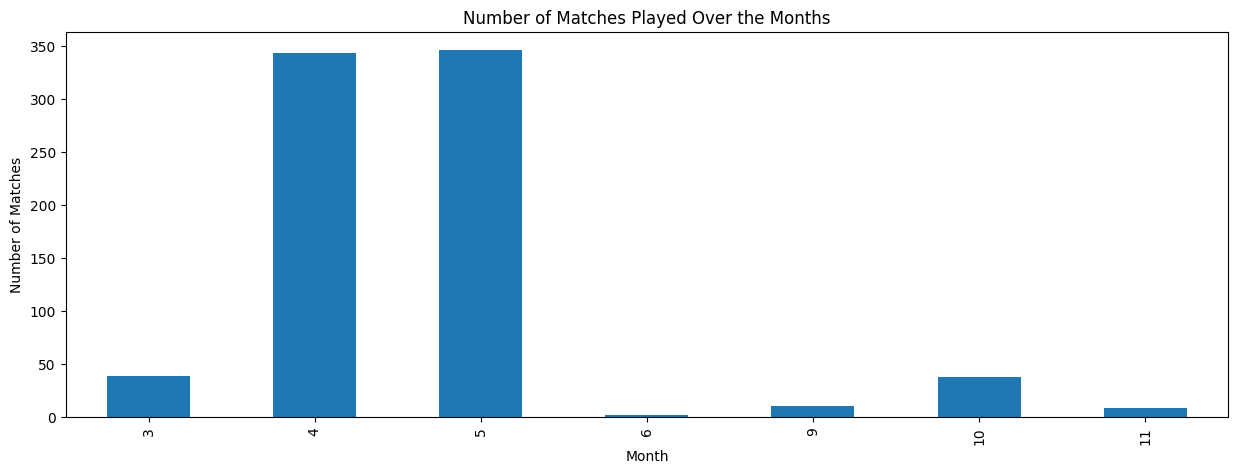

In [ ]:
plt.figure(figsize=(15, 5))
data['month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played Over the Months')
plt.show()

**No of cities and match hosted by them**

In [ ]:
data.city.value_counts()

Mumbai            100
Kolkata            77
Delhi              72
Hyderabad          63
Bangalore          62
Chandigarh         56
Chennai            56
Jaipur             47
Pune               38
Abu Dhabi          27
Dubai              23
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Sharjah            12
Ahmedabad          11
Dharamsala          9
Rajkot              9
Indore              9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Raipur              6
Cape Town           6
Kochi               5
Kanpur              4
Nagpur              3
East London         3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

**Top 10 venues with the highest number of matches played**

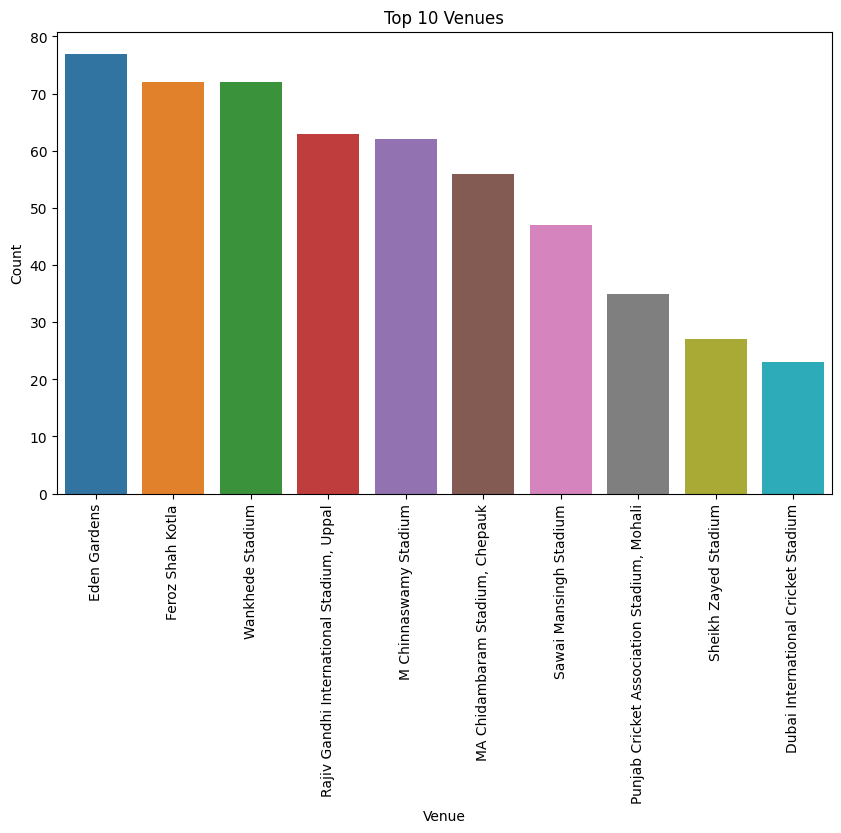

In [ ]:
venue_counts = data['venue'].value_counts().head(10)

# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Use Seaborn's barplot to plot the count of matches for each of the top 10 venues
# The 'x' parameter is set to the venue names (index of venue_counts), and 'y' is set to the corresponding match counts (values of venue_counts)
sns.barplot(x=venue_counts.index, y=venue_counts.values)

# Add labels for x and y axes
plt.xlabel('Venue')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Top 10 Venues')

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

**Team who won most tosses**

In [ ]:
data['toss_winner'].value_counts()

Mumbai Indians                 100
Chennai Super Kings             96
Kolkata Knight Riders           96
Rajasthan Royals                83
Royal Challengers Bangalore     81
Kings XI Punjab                 81
Delhi Daredevils                79
Sunrisers Hyderabad             53
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  19
Gujarat Lions                   14
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

**Bar diagram of matches won by teams**

<Axes: >

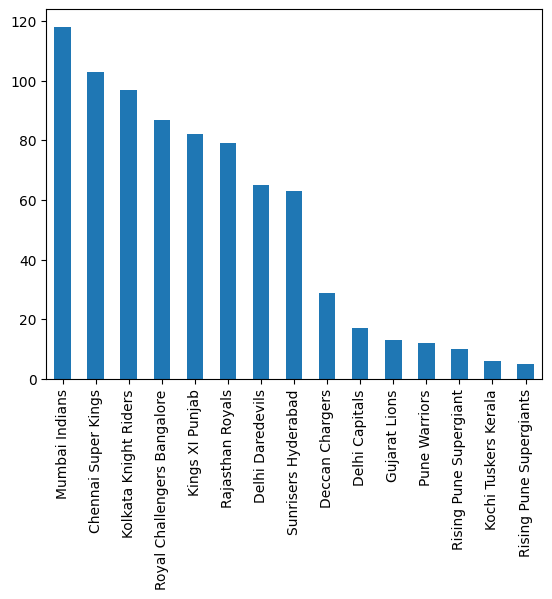

In [ ]:
data['winner'].value_counts().plot(kind ='bar')

**Top 5 player of the match**

In [ ]:
data['player_of_match'].value_counts()[0:5]

AB de Villiers    22
CH Gayle          22
RG Sharma         18
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

**Win percentage for each team**

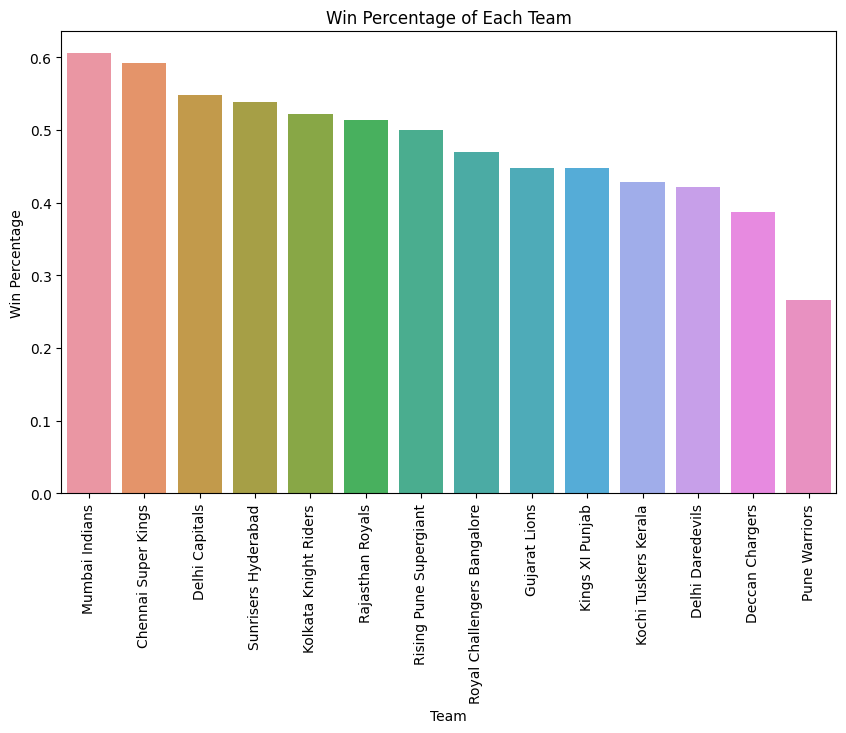

In [ ]:
team_wins = data['winner'].value_counts()
team_matches = data['team1'].value_counts() + data['team2'].value_counts()
win_percentage = (team_wins / team_matches).sort_values(ascending=False)

# Plot win percentage for each team
plt.figure(figsize=(10, 6))
sns.barplot(x=win_percentage.index, y=win_percentage.values)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Each Team')
plt.show()

**Decision after winning the toss**

In [ ]:
toss=data['toss_decision'].value_counts()
toss

field    477
bat      309
Name: toss_decision, dtype: int64

**Percentage of choosing field after winning the toss**

In [ ]:
(477/786)*100

60.68702290076335

**Percentage of choosing to bat first after winning the toss**

In [ ]:
(309/786)*100


39.31297709923664

**Best stadium for winning by wickets**

In [ ]:
data.venue[data.result == 'wickets'].value_counts().head(5)

Eden Gardens                                 45
Feroz Shah Kotla                             37
Wankhede Stadium                             37
M Chinnaswamy Stadium                        36
Rajiv Gandhi International Stadium, Uppal    35
Name: venue, dtype: int64

**Best stadium for winning by runs**

In [ ]:

data.venue[data.result == 'runs'].value_counts().head(5)

Wankhede Stadium                             35
Feroz Shah Kotla                             35
MA Chidambaram Stadium, Chepauk              34
Eden Gardens                                 32
Rajiv Gandhi International Stadium, Uppal    28
Name: venue, dtype: int64

**OBSERVATIONS**

*   **April and may are the months wear most match happned.**
*   **Highest number of matches played in eden Gardens.**
*   **Mumbai indians won most tosses.**
*   **Mumbai indians won most matches.**
*   **AB de Villiers won most man of the match.**
*   **Mumbai indians have best Win percentage.**













